In [29]:
# Import packages/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # to add nice background to the plots

# to display graphs in Jupyter notebook
%matplotlib inline       


In [6]:
data = pd.read_csv('CardioGoodFitness.csv') #read the data

In [7]:
df = data.copy() # copy data into df to aoid making changes in original data, we will use this for any manipulations.

In [8]:
df.head(10)  # looking at the first 10 entries in the data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [11]:
df.shape #check the shape of the data, dataset has 180 rows and 9 columns

(180, 9)

In [158]:
df.info() #get column info
#observations:
# 1. Product, Gender and MaritalStatus should be categorical values
# 2. All columns have the same number of non-null values, 180, which is also the total number of rows so there are no missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [160]:
#types of data present
df.dtypes.value_counts()

# 6 columns are of type interger
# 3 columns are of type object(the categorcal variables)

int64     6
object    3
dtype: int64

In [161]:
df.describe(include = 'all')# see info about the categorical data
#Observations:
# 1. There are 3 types of Products(treadmills) that are sold at the store
# 2. Product TM195 has the highest entries, 80 in he dataset
# 3. 104 of the 180 data sample are Males
# 4. 107 of the 180 customers in dataset are Partnered

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [164]:
# Check for missing Values

df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [95]:
df.mode() # Mode of the variables

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,25,Male,16,Partnered,3,3,45480,85


In [97]:
data.cov()  # see covariance between variables

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [98]:
data.corr()  # see correlation between variables

#OBSERVATIONS:
#1. Education has the highest correlation with Income, followed by the Fitness of the customer
#2. Usage has a high correlation with Miles, followed by Fitness
#3. Fitness has the highest correlation with Miles, followed by Usage
#4. Income has the highest correlation with Education, followed by Miles
#5. Miles has the highest correlation with Fitness followed by Usage

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [149]:
def histo_box_violin(data):
    sns.boxplot(data, showmeans=True) #plot a boxplot of data with a green triangle marking the mean value 
    plt.show()
    
    sns.distplot(data, rug=True)      # plot histogram of data
    plt.show()
    sns.violinplot(data)              # violin plot of data
    

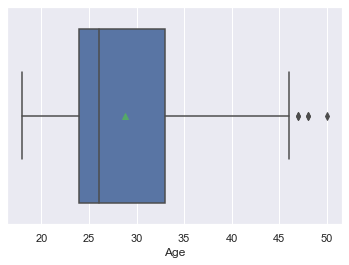

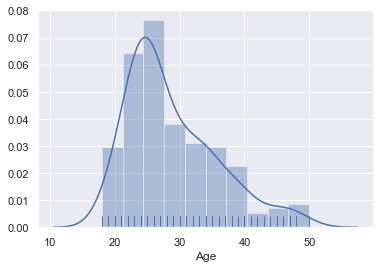

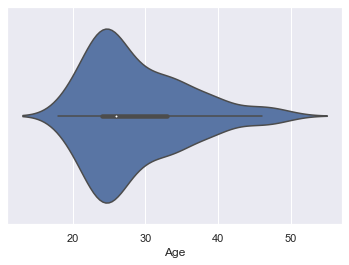

In [152]:
#EDA - UNIVARIATE, Numerical Data

#AGE

histo_box_violin(df['Age'])

#


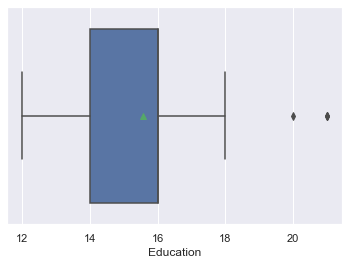

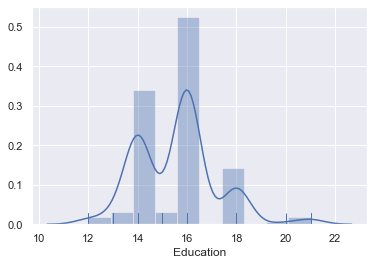

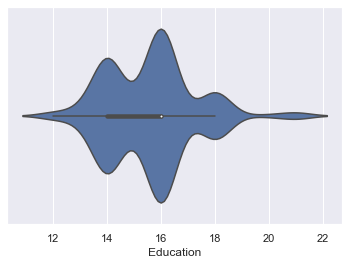

In [153]:
#EDA - UNIVARIATE, Numerical Data

#EDUCATION

histo_box_violin(df['Education'])

#OBSERVATIONS:
# 1. Mean < Median, so data is negatively skewed or left skewed
# 2. there are a few outlier values
# 3. Median is the same as Q3

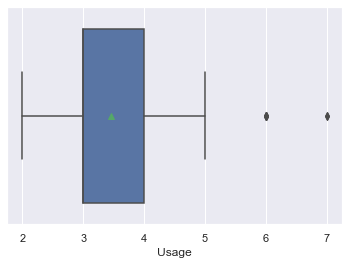

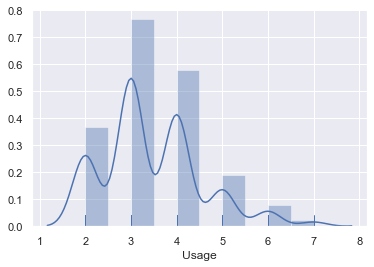

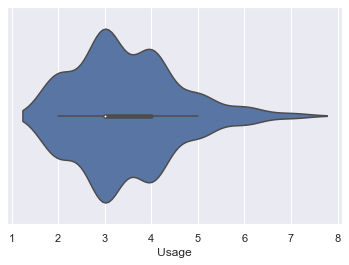

In [154]:
#EDA - UNIVARIATE, Numerical Data

#Usage

histo_box_violin(df['Usage'])

#OBSERVATIONS:
# 1. Mean > Median, so data is positively skewed or right skewed
# 2. there are a few outlier values
# 3. Median is the same as Q1

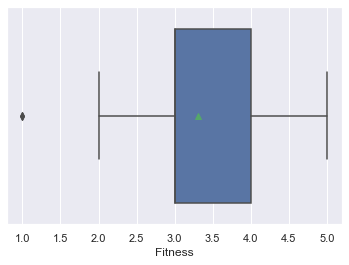

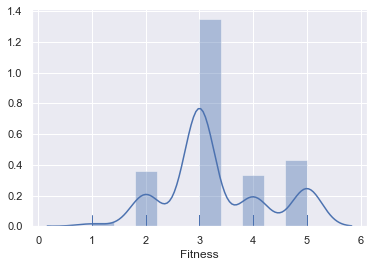

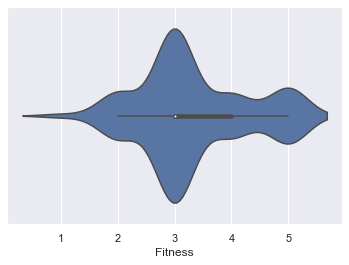

In [155]:
#EDA - UNIVARIATE, Numerical Data

#Fitness

histo_box_violin(df['Fitness'])

#OBSERVATIONS:
# 1. Mean > Median, so data is positively skewed or right skewed
# 2. there are outlier values
# 3. Median is the same as Q1

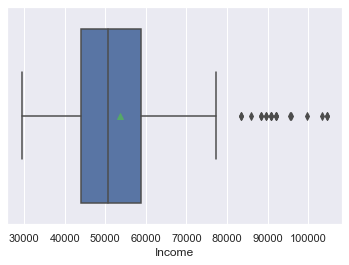

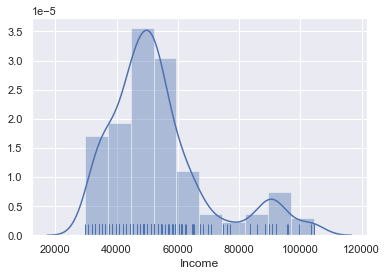

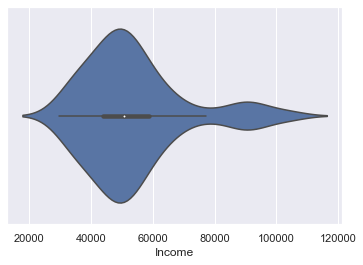

In [156]:
#EDA - UNIVARIATE, Numerical Data

#Income

histo_box_violin(df['Income'])

#OBSERVATIONS:
# 1. Mean > Median, so data is positively skewed or right skewed
# 2. there are quite a few outlier values


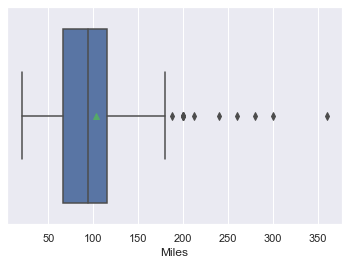

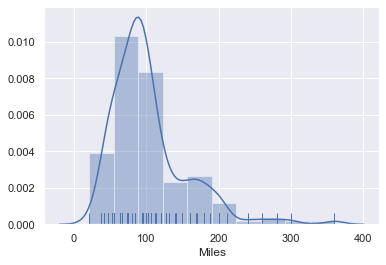

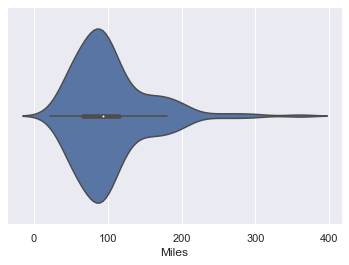

In [157]:
#EDA - UNIVARIATE, Numerical Data

#Miles

histo_box_violin(df['Miles'])

#OBSERVATIONS:
# 1. Mean > Median, so data is positively skewed or right skewed
# 2. there are quite a few outlier values


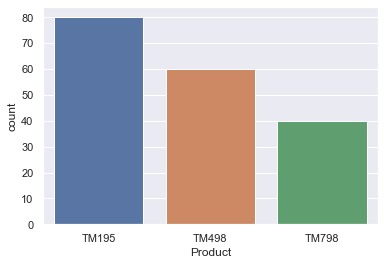

In [112]:
#EDA - UNIVARIATE, Categorical Data

#Product

sns.countplot(df['Product'])

#OBSERVATIONS:
# 1. TM 195 is the most selling treadmill in dataset followed by TM498 and then TM798
# 2.TM798 sales are half of TM195


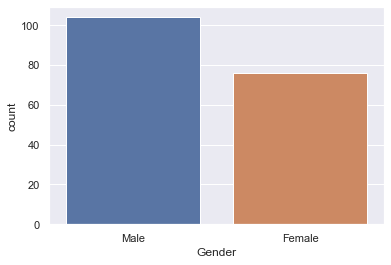

In [352]:
#EDA - UNIVARIATE, Categorical Data

#Gender

sns.countplot(df['Gender'])

#OBSERVATIONS:
# 1. More treadmills were bought my Men than by women


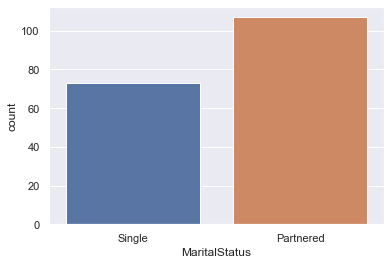

In [340]:
#EDA - UNIVARIATE, Categorical Data

#MaritalStatus

sns.countplot(df['MaritalStatus'])

#OBSERVATIONS:
# 1. More treadmills were bought by people who are Partnered and not Single.

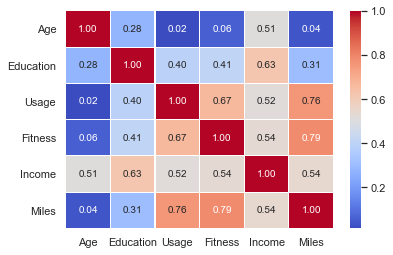

In [122]:
#EDA - BIVARIATE analysis

#Check correaltion between numercal variables.

sns.heatmap(df.corr(), annot=True, linewidths = 0.05, fmt = '.2f', cmap="coolwarm") 
#plot heatmap with correlations showing rounded to 2 decimal places, and a little spacing between the squares, 
# and colors of your choice

#OBSERVATIONS:
#1. There are no negative correlations
#2. Fitness and Miles have the highest correaltion
#3. Usage and Miles also have high correaltion, followed by Usage and Fitness. 
#4. Income has some correlation with all categories, most with Education
#5. Age has some correlation with Income but very little with the rest.
#6. Education has some correlation with Income but very low with other variables

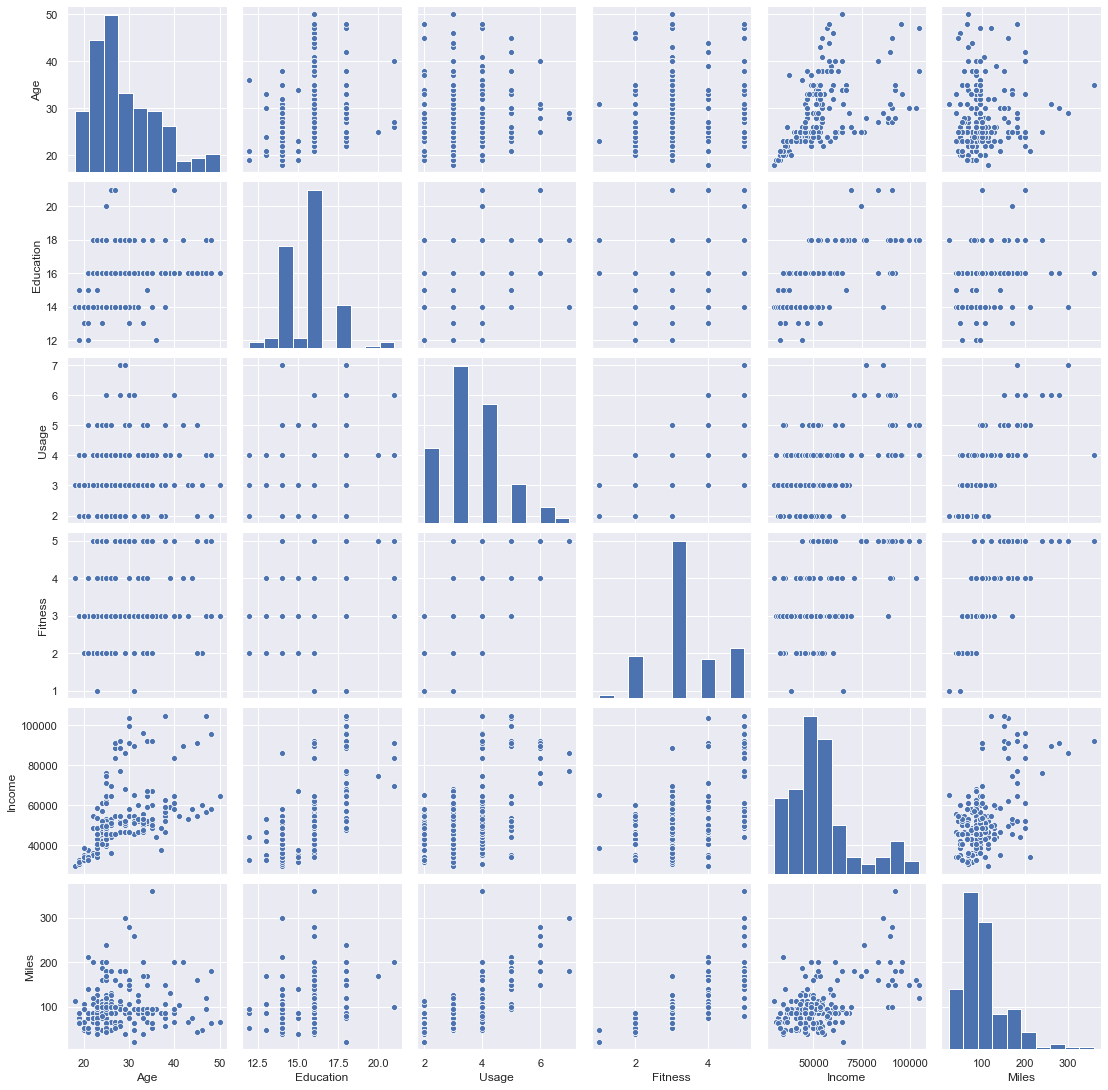

In [178]:
#EDA - BIVARIATE analysis

#Numerical vs Numerical

sns.pairplot(df)



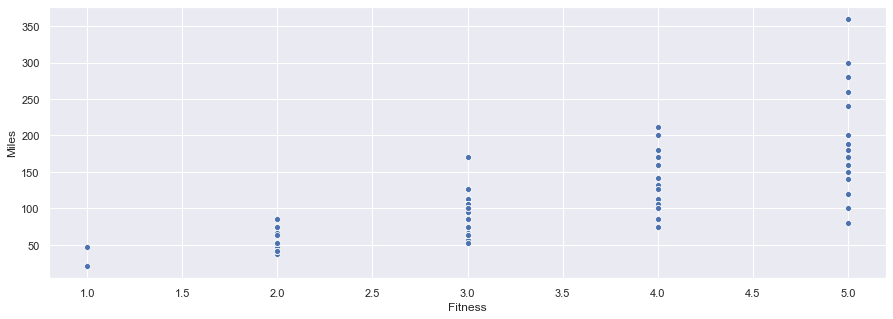

In [342]:
#EDA - BIVARIATE analysis

#Numerical vs Numerical

figure = plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Fitness'], y= df['Miles']) # plot scatterplot of Fitness and Miles

#OBSERVATIONS:
#1. Customers who rate themselves at higher Fitness levels, are the ones who are willing to run more Miles

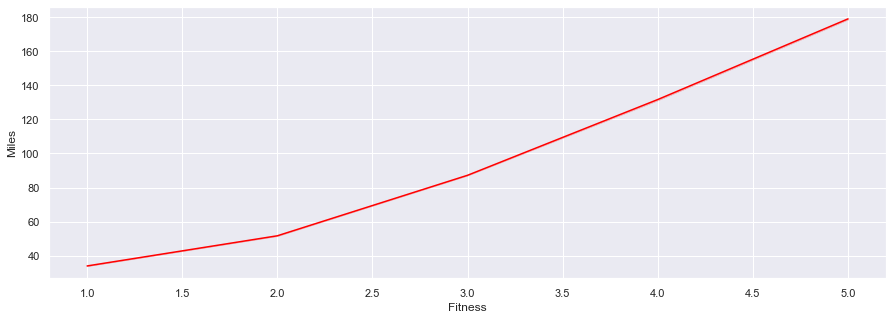

In [343]:
#EDA - BIVARIATE analysis

#Numerical vs Numerical

figure = plt.figure(figsize=(15,5))
sns.lineplot(x="Fitness", y="Miles",data=df,ci=0,color="RED") #lineplot to see relationship of Fitness
# and Miles


#OBSERVATIONS:
#1. People with higher Fitness level corresponds to higher goals of Miles run



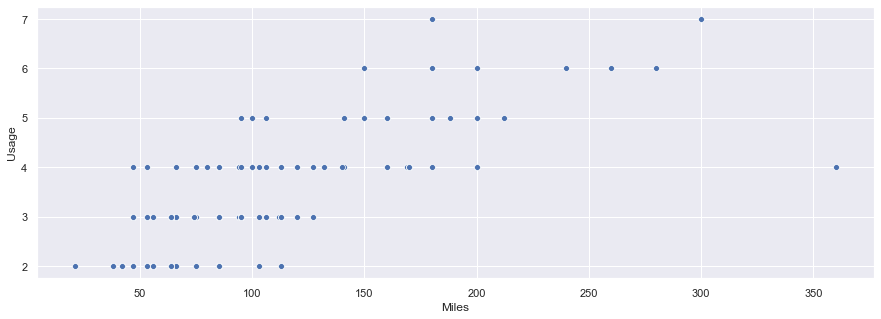

In [344]:
#EDA - BIVARIATE analysis

#Numerical vs Numerical

figure = plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Miles'], y= df['Usage']) # plot scatterplot of Usage and Miles

#OBSERVATIONS:
#1. Customers who desire to run more miles plan to use the treadmill more times during the week

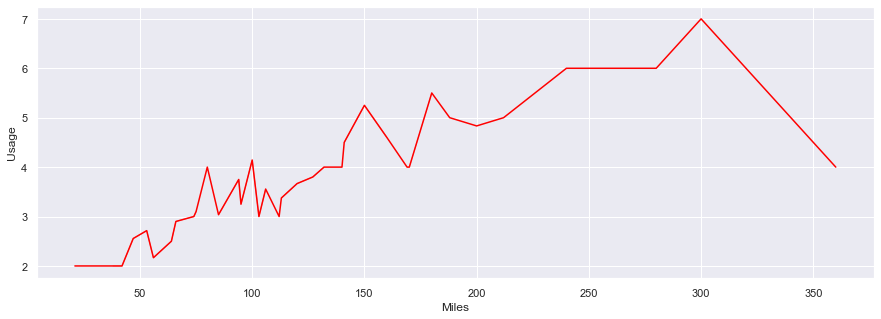

In [345]:
#EDA - BIVARIATE analysis

#Numerical vs Numerical

figure = plt.figure(figsize=(15,5))
sns.lineplot(x="Miles", y="Usage",data=df,ci=0,color="RED") #lineplot to see relationship of Fitness
# and Miles


#OBSERVATIONS:
#1. People with higher Fitness level corresponds to higher goals of Miles run, ignore outlier value



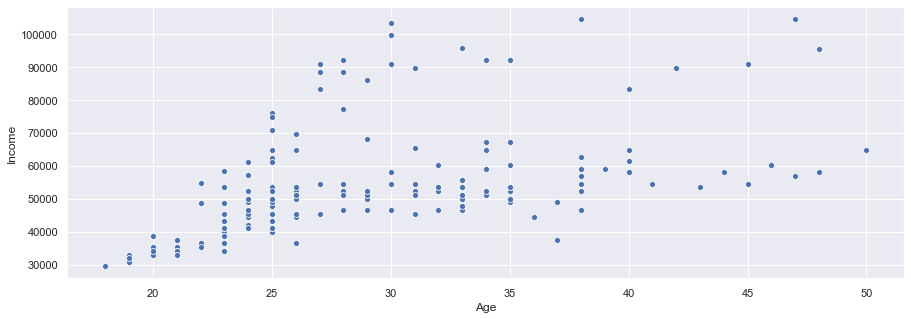

In [198]:
#EDA - BIVARIATE analysis

#Numerical vs Numerical

figure = plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Age'], y= df['Income']) # plot scatterplot of Age and Income

#OBSERVATIONS:
#1. most customers have incomes of $70k or less

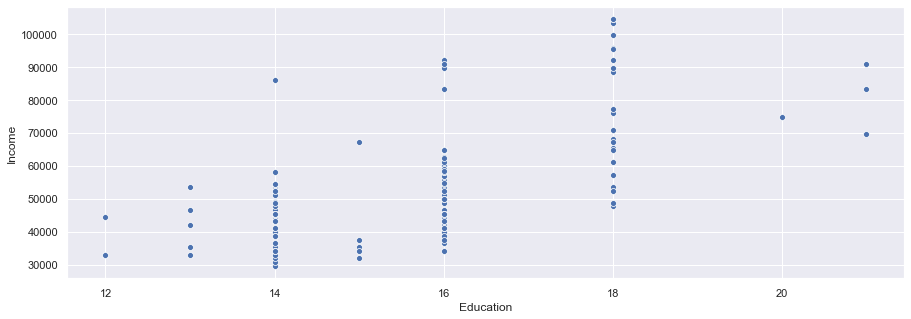

In [301]:
#EDA - BIVARIATE analysis

#Numerical vs Numerical

figure = plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Education'], y= df['Income']) # plot scatterplot of Education and Income

#OBSERVATIONS:
#1. There was not much of a difference in the Income of customers with 14 and 16 years of Education, except for a few outliers.
#2. Customers with 18 or more years of education tend to have higher incomes than those with less years of education.

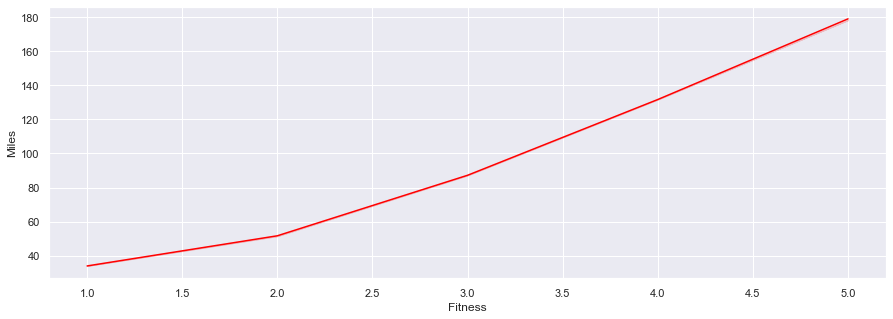

In [214]:
#EDA - BIVARIATE analysis

#Numerical vs Numerical

figure = plt.figure(figsize=(15,5))
sns.lineplot(x="Fitness", y="Miles",data=df,ci=0,color="RED") #lineplot to see relationship of Fitness
# and Miles


#OBSERVATIONS:
#1. People with higher Fitness level corresponds to higher goals of Miles run



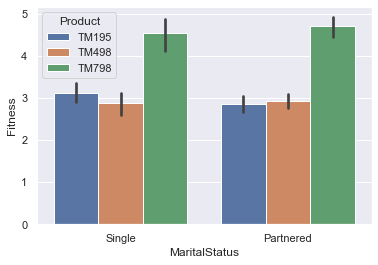

In [274]:
#EDA - MULTIVARIATE analysis

#Numerical vs Categorical

sns.barplot(x=df['MaritalStatus'], y=df['Fitness'], hue =df['Product']) # Bar plot to comnpare what is the prefered 
#Product depending on the Fitness score that customers assign themselves, with a hue on Product


#OBSERVATIONS:
# 1. People with higher Fitness level prefer TM798 across both Single and Partnered customers.
# 2. Partnered customers prefer TM498 and TM195 almost equally over lower Fitness levels
# 3. Single customers prefer TM498 a little more than TM195 over lower Fitness levels.

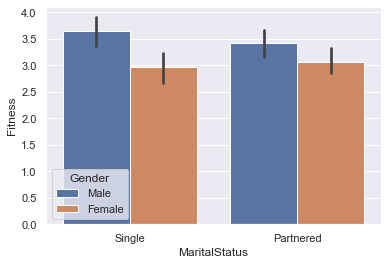

In [276]:
#EDA - MULTIVARIATE analysis

#Numerical vs Categorical

sns.barplot(x=df['MaritalStatus'], y=df['Fitness'], hue =df['Gender']) # Bar plot to comnpare what is the prefered 
#Product depending on the Fitness score that customers assign themselves, with a hue on Product


#OBSERVATIONS:
# 1. Women rate their Fitness level the same regardless of their Marital Status
# 2. Single Male Customers rate themselves with higher Fitness level than Partnered customers

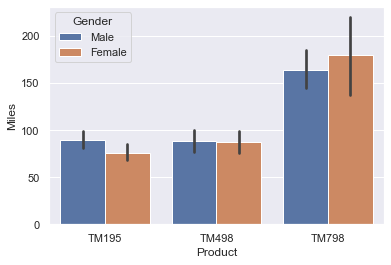

In [269]:
#EDA - MULTIVARIATE analysis

#Numerical vs Categorical

sns.barplot(x=df['Product'], y=df['Miles'], hue = df['Gender']) # Bar plot to comnpare what is the prefered 
# Product depending on the number of Miles that customers want to run with Gender in mind


#OBSERVATIONS:
# 1. Customers who bought TM798 had more womnen who wantrd to run higher number of Miles than men, even when taking the 
# variation into account
# 2. Customers of TM195 and TM498 generally wanted to run fewer Miles

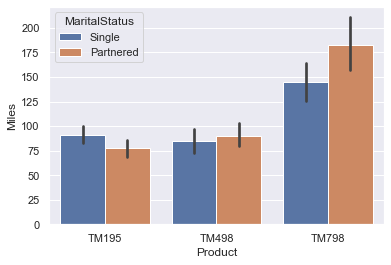

In [271]:
#EDA - MULTIVARIATE analysis

#Numerical vs Categorical

sns.barplot(x=df['Product'], y=df['Miles'], hue = df['MaritalStatus']) # Bar plot to comnpare what is the prefered 
# Product depending on the number of Miles that customers want to run with Gender in mind


#OBSERVATIONS:
# 1. More Partnered customers who wanted to run higher number of miles bought TM798
# 2. Customers of TM195 and TM498 generally wanted to run fewer Miles
# 3. TM195 was sold to more Single customers than Partnered

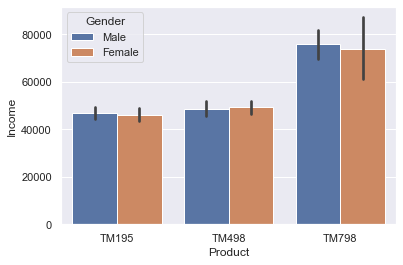

In [279]:
#EDA - MULTIVARIATE analysis

#Numerical vs Categorical

sns.barplot(x=df['Product'], y=df['Income'], hue =df['Gender']) # Bar plot to comnpare what is the prefered 
#Product depending on the Income of the customers 


#OBSERVATIONS:
# 1. People with higher Income end up buying TM798, equally across Gender 
# 2. TM798 could be a more expensive product, hypothesis.
# 3. the other two Products are fairly equivalent in their desireability based on Income
# 4. the Income across Genders is fairly comparable except the women who bought TM798. have a high variance in their income.


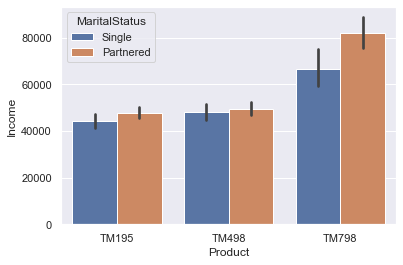

In [281]:
#EDA - MULTIVARIATE analysis

#Numerical vs Categorical

sns.barplot(x=df['Product'], y=df['Income'], hue =df['MaritalStatus']) # Bar plot to comnpare what is the prefered 
#Product depending on the Income of the customers 


#OBSERVATIONS:
# 1. Customers who bought TM798 earned had higher income than other customers. 
# 2. Income of customers who bought other two products was fairly similar regardless of marital status

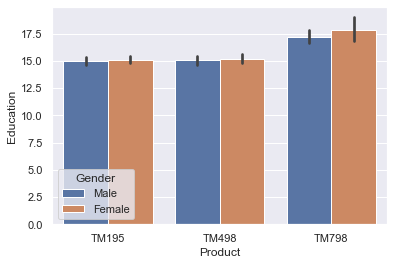

In [346]:
#EDA - MULTIVARIATE analysis

#Numerical vs Categorical

sns.barplot(x=df['Product'], y=df['Education'], hue = df['Gender']) # Bar plot to comnpare what is the prefered 
#Product depending on the Education of the customers 


#OBSERVATIONS:
# 1.Customers who buy TM798 tend to have higher education than the other two treadmills
# 2. Customers who bought the other two products had similar education levels, with little variation across Gender


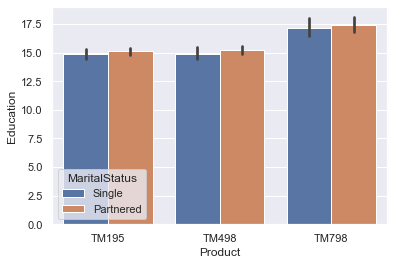

In [286]:
#EDA - MULTIVARIATE analysis

#Numerical vs Categorical

sns.barplot(x=df['Product'], y=df['Education'], hue = df['MaritalStatus']) # Bar plot to comnpare what is the prefered 
#Product depending on the Education of the customers 


#OBSERVATIONS:
# 1. customers with more education levels bought TM798 regardless of their gender
# 2. customers who bought the other two products had similar education levels, with little variation over gender.

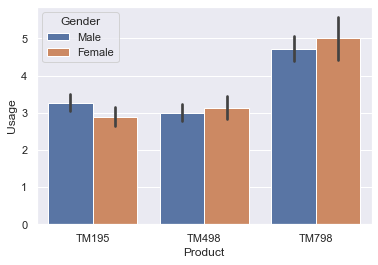

In [289]:
#EDA - MULTIVARIATE analysis

#Numerical vs Categorical

sns.barplot(x=df['Product'], y=df['Usage'], hue = df['Gender']) # Bar plot to comnpare what is the prefered 
# Product depending on the Usage of the customers across the different genders


#OBSERVATIONS:
# 1. People who want to workout more often end up buying TM798
# 2. Female customers who buy TM798 intend to use it more days than men
# 3. the other two Products are fairly equivalent in their desireability based on Income


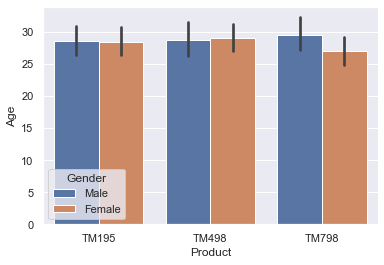

In [293]:
#EDA - MULTIVARIATE analysis

#Numerical vs Categorical

sns.barplot(x=df['Product'], y=df['Age'], hue =df['Gender']) # Bar plot to comnpare what is the prefered Product depending on the
# Age of the customers 


#OBSERVATIONS:
# 1. Average age of the customers who bought any of the 3 products is similar, except for female customers who bought 
# TM798 and are younger.

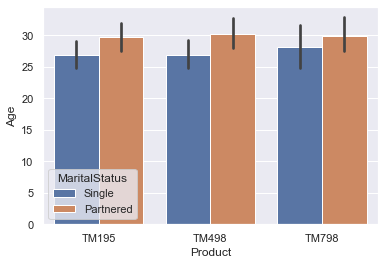

In [297]:
#EDA - MULTIVARIATE analysis

#Numerical vs Categorical

sns.barplot(x=df['Product'], y=df['Age'], hue =df['MaritalStatus']) # Bar plot to comnpare what is the prefered Product depending on the
# Age of the customers 


#OBSERVATIONS:
# 1. Age of Partnered customers across all Products was more than Single ones.

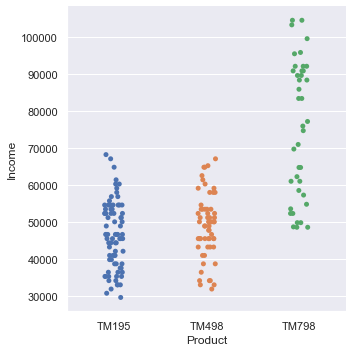

In [302]:
#EDA - MULTIVARIATE analysis

sns.catplot(x="Product", y="Income", data=df) #Scatterplot of Product vs Income

#OBSERVARTIONS:

# 1. Confirms that customers who bought TM798 had higher income than those who bought the other two treadmills
# 2. Other two products were bought by customers with similar income

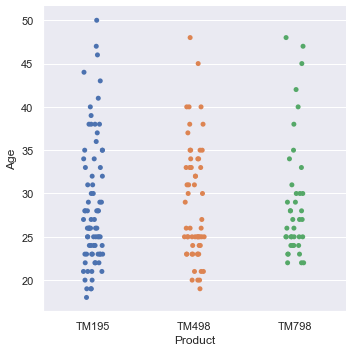

In [306]:
#EDA - MULTIVARIATE analysis

sns.catplot(x="Product", y="Age", data=df) #Scatterplot of Product vs Income

#OBSERVARTIONS:

# 1. Age does not have too much affect on the product that customers end up buying
# 2. Customers younger than about 22, tend to not buy TM798

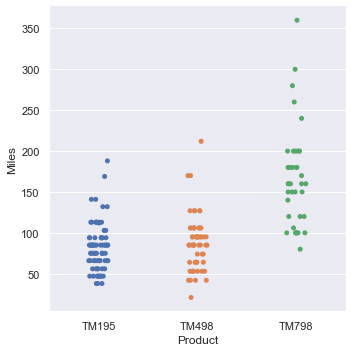

In [312]:
#EDA - MULTIVARIATE analysis

sns.catplot(x="Product", y="Miles",  data=df) #Scatterplot of Product vs Income

#OBSERVARTIONS:

# 1. Confirms that customers who bought TM798 wanted to run more miles than those who bought the other two treadmills
# 2. Other two products were bought by customers with similar miles goals

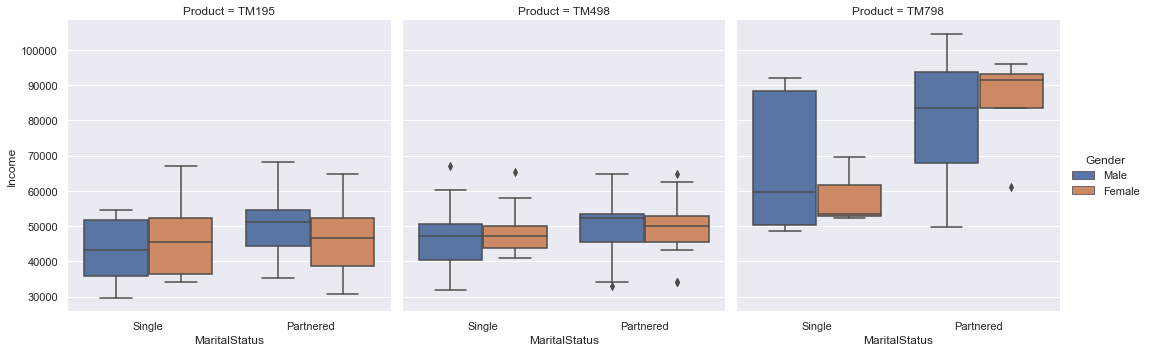

In [347]:

#EDA - MULTIVARIATE analysis

# Multi panel categorical plot
sns.catplot(x="MaritalStatus", y="Income", hue ="Gender", col="Product", data =df, kind = "box")


#OBSERVATIONS:

# 1. Single Male customers who buy TM798, have a higher income than the female customers in that category 
# 2. Customers of TM498 have similar incomes.
# 3. Partnered male customers who bought TM195 

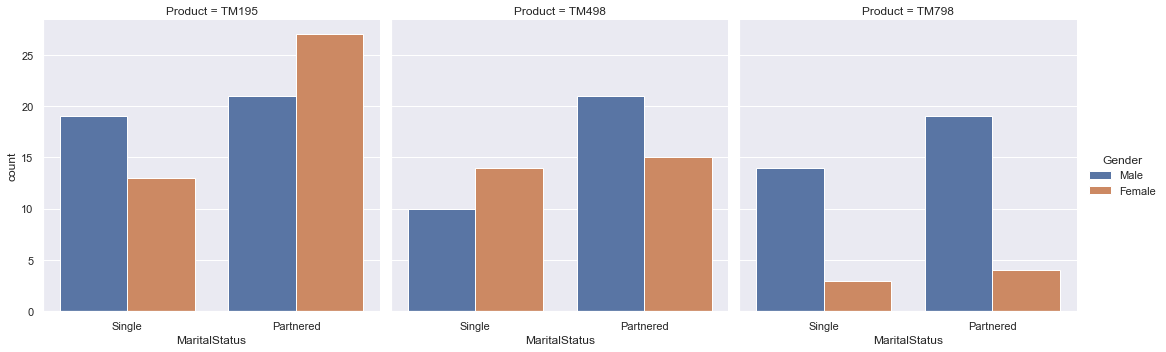

In [327]:

#EDA - MULTIVARIATE analysis

# Multi panel categorical plot

sns.catplot(x="MaritalStatus", hue ="Gender", col="Product", data =df, kind = "count")

#OBSERVATIONS:

# 1. TM195- More Partnered female customers bought this treadmill than any other treadmill by any other category
# 2. TM798 - Male customers bought this treadmill much more than womenregardless of marital status
# 3. TM498 - Partnered male customers bought this treadmill more than Single male customers.

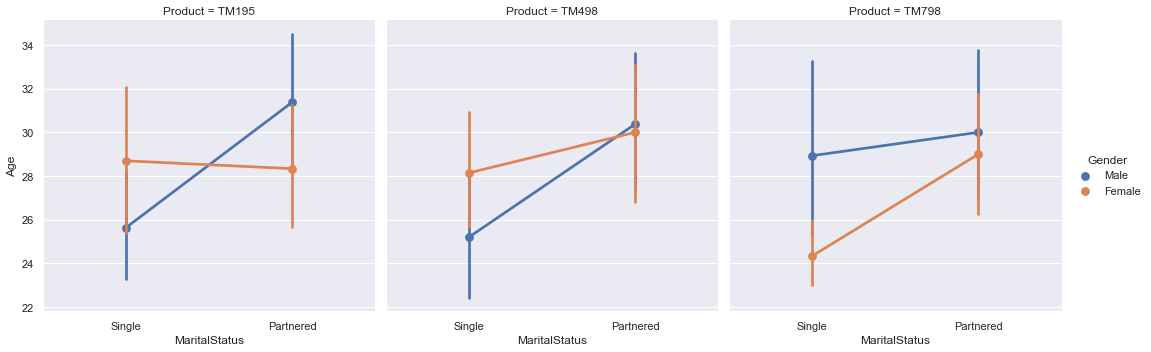

In [329]:

#EDA - MULTIVARIATE analysis

# Multi panel categorical plot

sns.catplot(x="MaritalStatus",y="Age", hue ="Gender", col="Product", data =df, kind = "point")

#OBSERVATIONS:
# 1. TM195- Partnered male customer who bought this treadmill are about 5 years older than single men who choose this
# 2. TM498 - Partnered male customer who bought this treadmill are about 5 years older than single men who choose this
# 3. TM798 - Male age variation across single and partnered is not much, but female age variation is more than other treadmills.

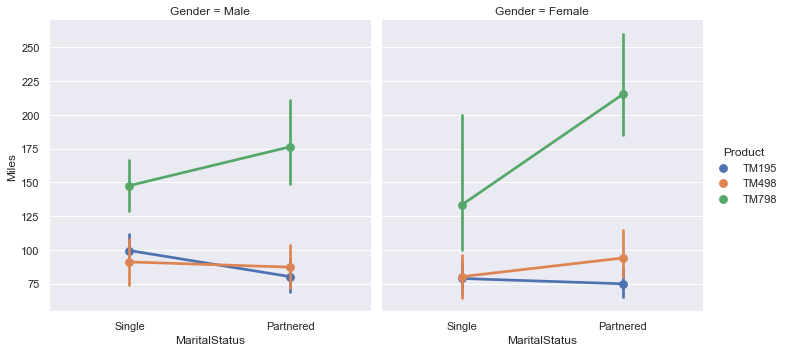

In [349]:

#EDA - MULTIVARIATE analysis

# Multi panel categorical plot

sns.catplot(x="MaritalStatus",y="Miles", hue ="Product", col="Gender", data =df, kind = "point")

#OBSERVATIONS:
# 1. customers who want to run more than 100 miles almost always buy TM798, regardless of their gender or marital status


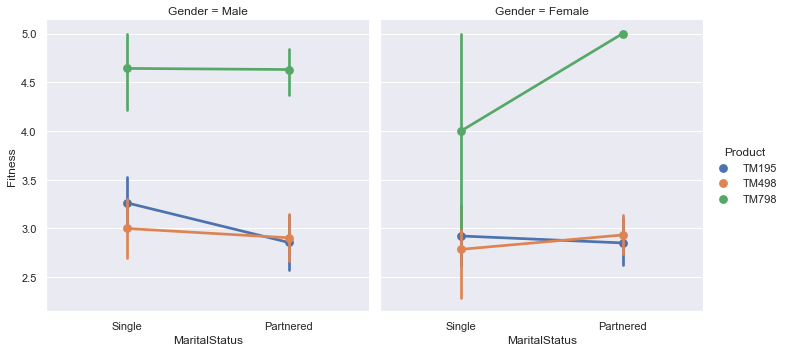

In [350]:

#EDA - MULTIVARIATE analysis

# Multi panel categorical plot

sns.catplot(x="MaritalStatus",y="Fitness", hue ="Product", col="Gender", data =df, kind = "point")

#OBSERVATIONS:
# 1. customers with higher Fitness levels buy TM798 regardless of gender or marital status

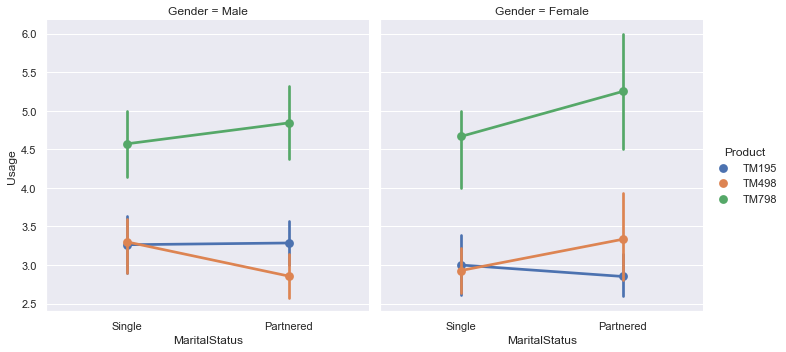

In [339]:

#EDA - MULTIVARIATE analysis

# Multi panel categorical plot

sns.catplot(x="MaritalStatus",y="Usage", hue ="Product", col="Gender", data =df, kind = "point")

#OBSERVATIONS:
# 1. customers with Usage more than 4 buy TM798 regardless of gender or marital status